# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Debi Welani Christin Saragih
- **Email:** mc009d5x0246@student.devacademy.id
- **ID Dicoding:** MC009D5X0246

## Menentukan Pertanyaan Bisnis

- Dalam satu hari, Penyewaan terbanyak terjadi pada saat kapan?, apakah di pagi hari,siang atau malam hari.
- Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda per bulannya?
-  Berapa persen kontribusi penyewa kasual dan penyewa terdaftar terhadap total penyewa?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Tabel Hour
hour_df=pd.read_csv("https://raw.githubusercontent.com/debswell/Bike-Sharing/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#Tabel Day
day_df=pd.read_csv("https://raw.githubusercontent.com/debswell/Bike-Sharing/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada tabel terdapat 16 kolom yang akan kita analisis yang nantinya akan saling berhubungan
- Dilihat dari tabel terdapat kolom cnt yang dimana itu merupakan kolom jumlah penyewa sepeda yang menyewa sepeda per jam dan per hari nya.

### Assessing Data

In [4]:
#Memeriksa Data pada tabel hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#memerika duplikasi data
print("Jumlah Duplikasi Data : ", hour_df.duplicated().sum())

Jumlah Duplikasi Data :  0


In [6]:
#Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
#Memeriksa data pada tabel Day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
#Memeriksa duplikasi data pada tabel Day
print("Jumlah duplikasi data : ", day_df.duplicated().sum())

Jumlah duplikasi data :  0


In [9]:
#Memriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada kedua tabel info terdapat kerancuan pada kolom dteday, harusnya tipe dari kolom tersebut adalah date bukan object

### Cleaning Data

In [10]:
#Memperbaiki tipe data pada kolom dteday pada tabel hour
datetime_col=['dteday']
for column in datetime_col:
  hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [11]:
#Memperbaiki tipe data pada kolom dteday pada tabel day
datetime_col=['dteday']
for column in datetime_col:
  day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Sudah membersihkan data pada bagian dteday, yaitu mengubah tipe data yang awalnya object menjadi date

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
#Melihat rangkuman parameter statistik pada tabel hour
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [13]:
#Membuat demografi penyewa berdasarkan waktu nya(holiday,weekday,workingday)
hour_df.groupby(['holiday', 'weekday', 'workingday']).agg({
    'cnt': ['sum', 'mean', 'median', 'std', 'min', 'max']
})

cnt                                        
                               sum        mean median         std min  max
holiday weekday workingday                                                
0       0       0           444027  177.468825  116.0  168.167710   1  776
        1       1           395898  186.568332  142.5  182.108719   1  968
        2       1           468096  192.632099  149.0  188.117367   1  970
        3       1           465645  189.981640  142.0  190.466915   1  977
        4       1           481475  198.710277  156.0  188.854567   1  976
        5       1           481296  197.333333  165.0  175.067581   1  957
        6       0           477807  190.209793  129.0  179.820569   1  783
1       1       0            59605  166.960784  100.0  162.468091   1  712
        2       0             1013   44.043478   32.0   41.126720   1  126
        3       0             7403  308.458333  401.5  202.209100  16  584
        4       0             3920   81.666667   46.0   77.569278   2  269
        5       0             6494  135.291667  129.0   95.655846   3  331

**Insight: Tabel Hour**
- Pada tabel hour terdapat jumlah penewa maksimal dalam 1 jam yaitu 977 dengan rata-rata 189 penyewa perjam nya
- Pada hubungan cnt dan (holiday,weekday,workingday), terlihat jumlah total penyewa minimal paling banyak terjadi pada saat holiday di hari ke-3 (Rabu)dan tidak hari kerja. Dan jumlah total penyewa maksimal paling banyak di saat tidak holiday di hari ke-3(Rabu) pada saat hari kerja(working day)
- Dilihat dari jumlah penyewa pada tabel, penyewa paling banyak terjadi pada hari kerja daripada holiday

In [14]:
#Melihat rangkuman parameter statistik pada tabel day
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [15]:
#Membuat demografi penyewa berdasarkan waktu nya(holiday,weekday,workingday)
day_df.groupby(['holiday', 'weekday', 'workingday']).agg({
    'cnt': ['sum', 'mean', 'median', 'std', 'min', 'max']
}).fillna(0)

cnt                                          \
                               sum         mean  median          std   min   
holiday weekday workingday                                                   
0       0       0           444027  4228.828571  4334.0  1872.496629   605   
        1       1           395898  4398.866667  4360.5  1749.872921    22   
        2       1           468096  4544.621359  4590.0  1802.560842   683   
        3       1           465645  4520.825243  4629.0  2028.275446   441   
        4       1           481475  4720.343137  4777.5  1919.276841   431   
        5       1           481296  4718.588235  4634.5  1881.876462  1167   
        6       0           477807  4550.542857  4521.0  2196.693009   627   
1       1       0            59605  3973.666667  4098.0  2061.976779  1000   
        2       0             1013  1013.000000  1013.0     0.000000  1013   
        3       0             7403  7403.000000  7403.0     0.000000  7403   
        4       0             3920  1960.000000  1960.0   657.609307  1495   
        5       0             6494  3247.000000  3247.0   171.119841  3126   

                                  
                             max  
holiday weekday workingday        
0       0       0           8227  
        1       1           7525  
        2       1           7767  
        3       1           8173  
        4       1           7804  
        5       1           8362  
        6       0           8714  
1       1       0           6370  
        2       0           1013  
        3       0           7403  
        4       0           2425  
        5       0           3368

**Insight: Tabel Day**
- Pada tabel hour terdapat jumlah penewa maksimal per hari yaitu 8714 penyewa dengan rata-rata 4504 penyewa per hari nya
- Sama seperti pada tabel hour, penyewa paling banyak terjadi pada hari non holiday atau di hari kerja.
- Penyewa paling banyak terjadi pada saat hari kerja di hari ke-4(Kamis) dengan total penyewa 481475

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dalam satu hari, Penyewaan terbanyak terjadi pada saat kapan?, apakah di pagi hari,siang atau malam hari.

**Mencari tahu jumlah penyewaan berdasarkan waktu dalam 1 hari**

Membagi periode waktu berdasarkan jam(hr):
- Pagi : 0-11 (00.00-11.59)
- Siang 12-17 (12.00-17.59)
- Malam : 18-23 (18.00-23.59)

In [70]:
#Kita akan membuat kondisi untuk mengelompokkan periode waktunya
def condition(hour):
  if 0 <= hour <= 11:
    return 'Morning'
  elif 12 <= hour <= 17:
    return 'Afternoon'
  elif 18 <= hour <= 23:
    return 'Night'

hour_df['time_period']=hour_df['hr'].apply(condition)
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_period
16760,16761,2012-12-06,4,1,12,3,0,4,1,1,0.22,0.2273,0.55,0.1940,0,2,2,Morning
9978,9979,2012-02-25,1,1,2,19,0,6,0,1,0.26,0.2121,0.33,0.4478,12,137,149,Night
16560,16561,2012-11-27,4,1,11,18,0,2,1,1,0.26,0.2273,0.81,0.3582,13,469,482,Night
5288,5289,2011-08-13,3,0,8,6,0,6,0,1,0.64,0.6061,0.73,0.0896,3,19,22,Morning
8834,8835,2012-01-08,1,1,1,22,0,0,0,1,0.26,0.2727,0.60,0.1045,4,54,58,Night


In [63]:
#Mencari tahu jumlah penyewa berdasarkan periode time
time_period_rentals = hour_df.groupby(by='time_period').agg({
    'cnt':['sum', 'mean', 'median', 'std', 'min', 'max']
}).reset_index()

time_period_rentals

time_period      cnt                                        
                   sum        mean median         std min  max
0   Afternoon  1292742  295.483886  258.0  181.656294   3  976
1     Morning  1013828  117.395553   50.0  149.721590   1  839
2       Night   986109  225.757555  177.0  175.218285   2  977

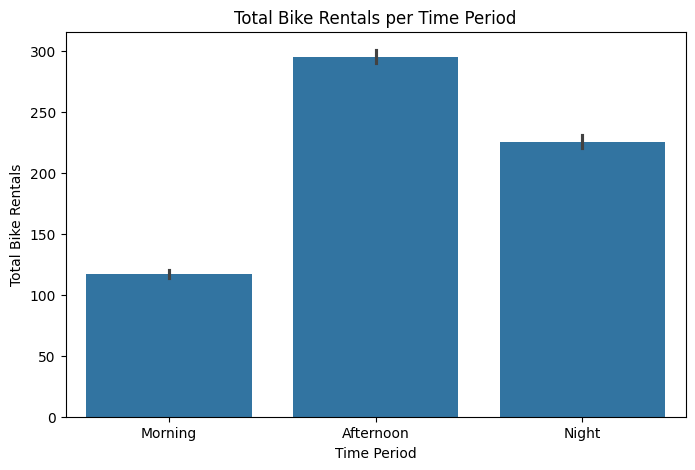

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(x='time_period', y='cnt', data=hour_df)
plt.xlabel('Time Period')
plt.ylabel("Total Bike Rentals")
plt.title("Total Bike Rentals per Time Period")
plt.show()

**Insight:**
- Pertanyaan 1

Dari visualisasi terlihat rata-rata penyewa yang paling banyak itu terjadi pada periode Siang hari

### Pertanyaan 2: Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda per bulannya?

**Pernyataan Cuaca**
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy (Cerah)
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Berawan)
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (Hujan Ringan)
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Hujan Lebat)

In [97]:
#mengelompokkan data menjadi perbulannya
day_df['month']=day_df['dteday'].dt.strftime('%B')
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999,December
482,483,2012-04-27,2,1,4,0,5,1,1,0.457500,0.452637,0.400833,0.347633,1014,5219,6233,April
673,674,2012-11-04,4,1,11,0,0,0,1,0.325833,0.329538,0.532917,0.179108,1201,3906,5107,November
76,77,2011-03-18,1,0,3,0,5,1,1,0.540000,0.527009,0.525217,0.231017,884,2355,3239,March
605,606,2012-08-28,3,1,8,0,2,1,1,0.728333,0.666050,0.620000,0.190925,935,6105,7040,August


In [104]:
#Menampilkan jumlah penyewa pada kondisi cuaca
#mengurutkan Bulannya terlebih dahulu supaya hasilnya dimulai dari January
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

day_df['month'] = pd.Categorical(day_df['month'],
                  categories=month_order,
                  ordered=True)
#Menghitung jumlah penyewa di setiap kondisi perbulannya
weather_rentals = day_df.groupby(by=['month', 'weathersit']).agg({
    'cnt':['sum', 'mean']
})
weather_rentals

<ipython-input-104-1aea63a61244>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = day_df.groupby(by=['month', 'weathersit']).agg({


cnt             
                         sum         mean
month     weathersit                     
January   1            87391  2361.918919
          2            47036  1959.833333
          3              506   506.000000
February  1           105048  2839.135135
          2            44135  2322.894737
          3             2169  2169.000000
March     1           139989  3888.583333
          2            86623  3609.291667
          3             2308  1154.000000
April     1           197149  5328.351351
          2            70123  3339.190476
          3             1822   911.000000
May       1           210838  5698.324324
          2           120848  4833.920000
          3                0          NaN
June      1           278830  6061.521739
          2            67512  4822.285714
          3                0          NaN
July      1           281366  5516.980392
          2            59123  5912.300000
          3             4459  4459.000000
August    1           250921  5835.372093
          2           100273  5277.526316
          3                0          NaN
September 1           222200  6733.333333
          2           117243  4885.125000
          3             6548  2182.666667
October   1           187497  5859.281250
          2           124727  4989.080000
          3            10128  2025.600000
November  1           184625  4395.833333
          2            64017  4267.800000
          3             6189  2063.000000
December  1           112098  3503.062500
          2            95198  3525.851852
          3             3740  1246.666667

<ipython-input-115-abf1c9bed71d>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = subset.groupby('month')['cnt'].sum()


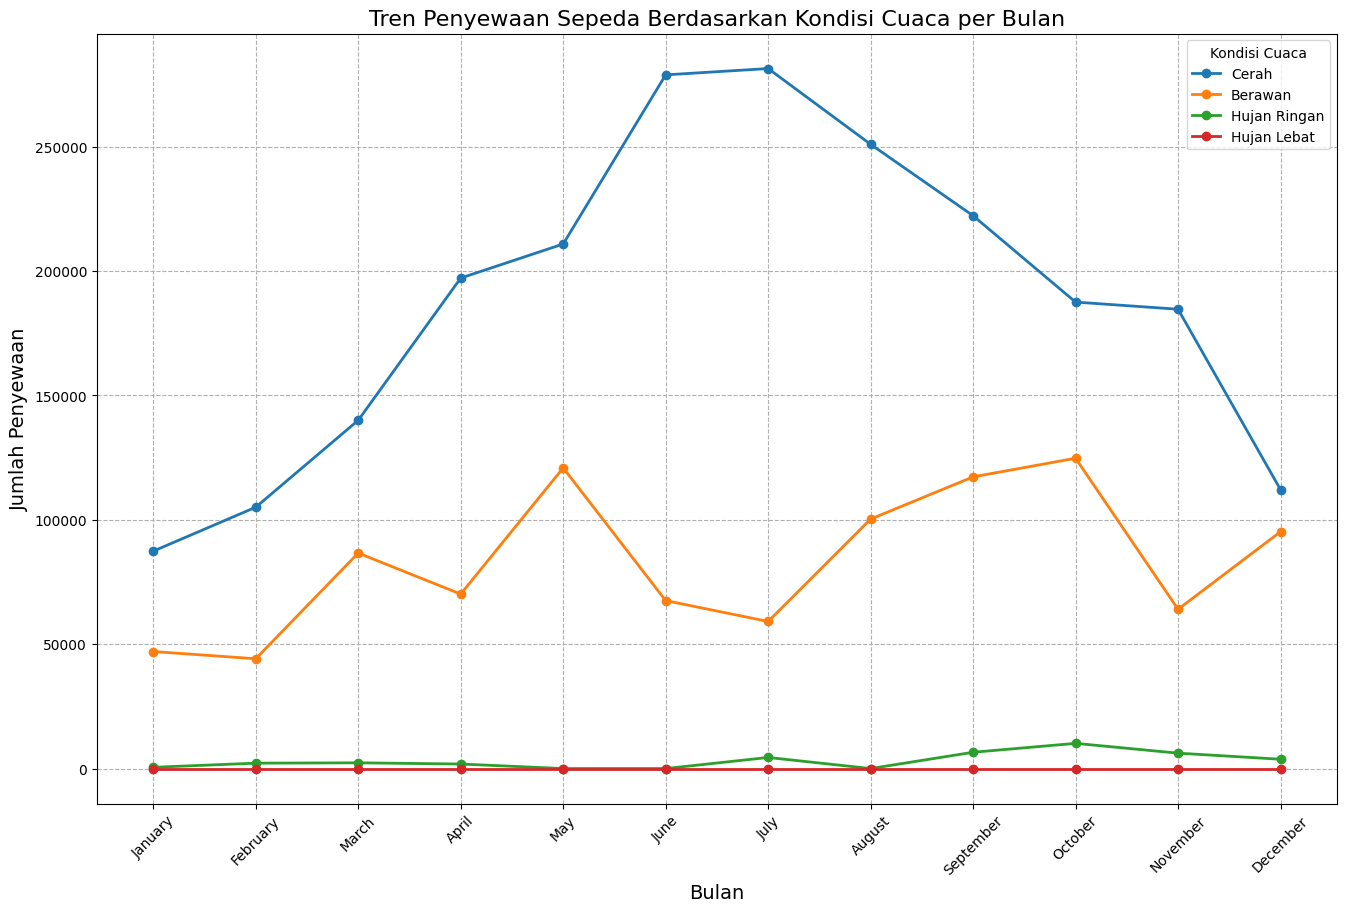

In [115]:
# Plot line chart untuk setiap kondisi cuaca
plt.figure(figsize=(16, 10))
for i in range(1, 5):  # weathersit memiliki nilai 1,2,3,4
    subset = day_df[day_df['weathersit'] == i]
    monthly_data = subset.groupby('month')['cnt'].sum()
    plt.plot(monthly_data.index, monthly_data.values, marker='o', linewidth=2,
             label=f'Kondisi Cuaca {i}')

plt.title('Tren Penyewaan Sepeda Berdasarkan Kondisi Cuaca per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Kondisi Cuaca', labels=['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Lebat'])
plt.grid(True, linestyle='--')
plt.show()

**Insight:**
- Pertanyaan 2

Dari visualisasi dapat kita lihat bahwa cuaca sangat berpengaruh terhadap jumlah penyewa sepeda, dari data yang kita miliki penyewa paling tinggi terjadi ketika cuaca sedang cerah dan ketika hujan lebat tidak ada penyewa.

### Pertanyaan 3: Berapa persen kontribusi penyewa kasual dan penyewa terdaftar terhadap total penyewa?

In [125]:
#Membuat variabel untuk menyimpan total jumlah penyewa kasual,terdaftar dan seluruhnya
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_cnt = day_df['cnt'].sum()

In [126]:
#Menghitung persentase dari total kasual dan terdaftar
percent_casual = ((total_casual / total_cnt) * 100).round(2)
percent_registered = ((total_registered / total_cnt) * 100).round(2)

In [129]:
contribution_df=pd.DataFrame({
    'User_Type': ['Casual', 'Registered'],
    'Total_Count': [total_casual, total_registered],
    'Percentage': [percent_casual, percent_registered]
})

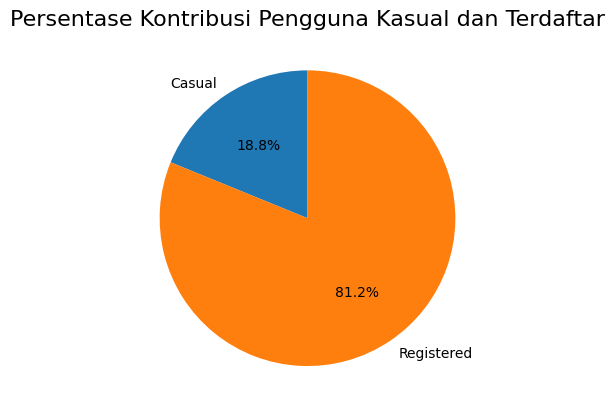

In [131]:
plt.pie(
    x=contribution_df['Total_Count'],
    labels=contribution_df['User_Type'],
    autopct='%1.1f%%',
    startangle=90,
)
plt.title('Persentase Kontribusi Pengguna Kasual dan Terdaftar', fontsize=16)
plt.show()

**Insight:**
- Pertanyaan 3

Dari hasil pie chart terlihat bahwa kontribusi penyewa casual hanya 18.8% dari total seluruh penyewa sedangkan untuk penyewa terdaftar sebanyak 81.2%

## Analisis Lanjutan (Opsional)

In [15]:
##--

## Conclusion

- Conclution pertanyaan 1

Penyewa sepeda paling banyak terjadi pada periode siang hari yaitu diantara jam 12-17 (12.00-17.59), dengan total sebanyak 1292742 penyewa dan rata-rata 976.
- Conclution pertanyaan 2

Kondisi cuaca sangat berpengaruh terhadap jumlah penyewa sepeda, apabila kondisi cuaca sedang cerah maka jumlah penyewa akan banyak sedangkan apabila sedang berawan dan hujan ringan, penyewa akan sedikit dan apabila sedang hujan berat maka tidak ada yang melakukan sewa sepeda, dapat dilihat dari grafik yang tertera pada visualisasi pertanyaan 2.
- Conclusion pertanyaan 3

Pada pie chart yang tertera pada visualisasi pertanyaan 3 terlihat jelas bahwa kontribusi penyewa kasual jauh lebih sedikit dibandingan dengan penyewa terdaftar, yaitu hanya sebanyak 18.2% dari total penyewa dan penyewa terdaftar berkontribusi banyak pada total jumlah penyewa yaitu sebanyak 81.2%. Artinya dari total penyewa sepeda, yang paling banyak melakukan sewa sepeda yaitu yang sudah terdaftar sebagai member pada penyewaan sepeda.

In [135]:
hour_df.to_csv("hour_data.csv", index=False)
day_df.to_csv("day_data.csv", index=False)